In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data to vscode

In [3]:
path = r"C:\PYTHON\Practice"
os.chdir(path)
tt = pd.read_csv('titaniccopy.csv')
ttcopy = tt.copy()
ttcopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ttcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check for missing data

In [5]:
ttcopy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Check for correlation of the columns to the target column
Survived is the target column; helps us see how many people survived depending the fare they payed,where they embarked, the class they say.
Every other column is dependent on the survived column

In [6]:
#checks for correlation on numeric data types only
corr = ttcopy.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
corr

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [7]:
ttcopy['Family_size'] = ttcopy['Parch'] + ttcopy['SibSp'] + 1
ttcopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Fill null values using simple imputer

In [8]:
from sklearn.impute import SimpleImputer
print('average age before imputation',ttcopy['Age'].median())
Age_imputer= SimpleImputer(missing_values=np.nan, strategy= 'median')
ttcopy['Age']=Age_imputer.fit_transform(ttcopy[['Age']])
print('average Age after imputation',ttcopy['Age'].median())
print(ttcopy.head())


average age before imputation 28.0
average Age after imputation 28.0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family_size  
0      0         A/5 21171   7.2500   NaN        S            2  
1      0          PC 17599  71.2833   C85        C            2  
2      0  STON/O2. 3101282   7.9250   NaN        S   

# Fill null values on the embarked column with mode

In [9]:
mode_value =ttcopy['Embarked'].mode()[0]
ttcopy['Embarked'].fillna(mode_value, inplace=True)
ttcopy.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6216\1395479648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ttcopy['Embarked'].fillna(mode_value, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_size      0
dtype: int64

# Drop the columns we just combined and the one with the most null values

In [10]:
ttcopy.drop(columns=['Parch','SibSp','Cabin','PassengerId'], inplace=True)
ttcopy.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


# Check for categorical columns

In [11]:
print(ttcopy['Survived'].value_counts())
print(ttcopy['Pclass'].value_counts())
print(ttcopy['Sex'].value_counts())
print(ttcopy['Family_size'].value_counts())
print(ttcopy['Embarked'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


# Grade the Age column into groups

In [12]:
bins = [0,11,21,46,90]
labels = ['child','Teenager','Adult','Senior']
ttcopy['Age_group']= pd.cut(ttcopy['Age'],  bins=bins, labels=labels, right=False)
ttcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   Ticket       891 non-null    object  
 6   Fare         891 non-null    float64 
 7   Embarked     891 non-null    object  
 8   Family_size  891 non-null    int64   
 9   Age_group    891 non-null    category
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 63.8+ KB


In [13]:
ttcopy.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size,Age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,2,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1,Adult


# Data Visualization of the data
  - Pie chart for survived rate

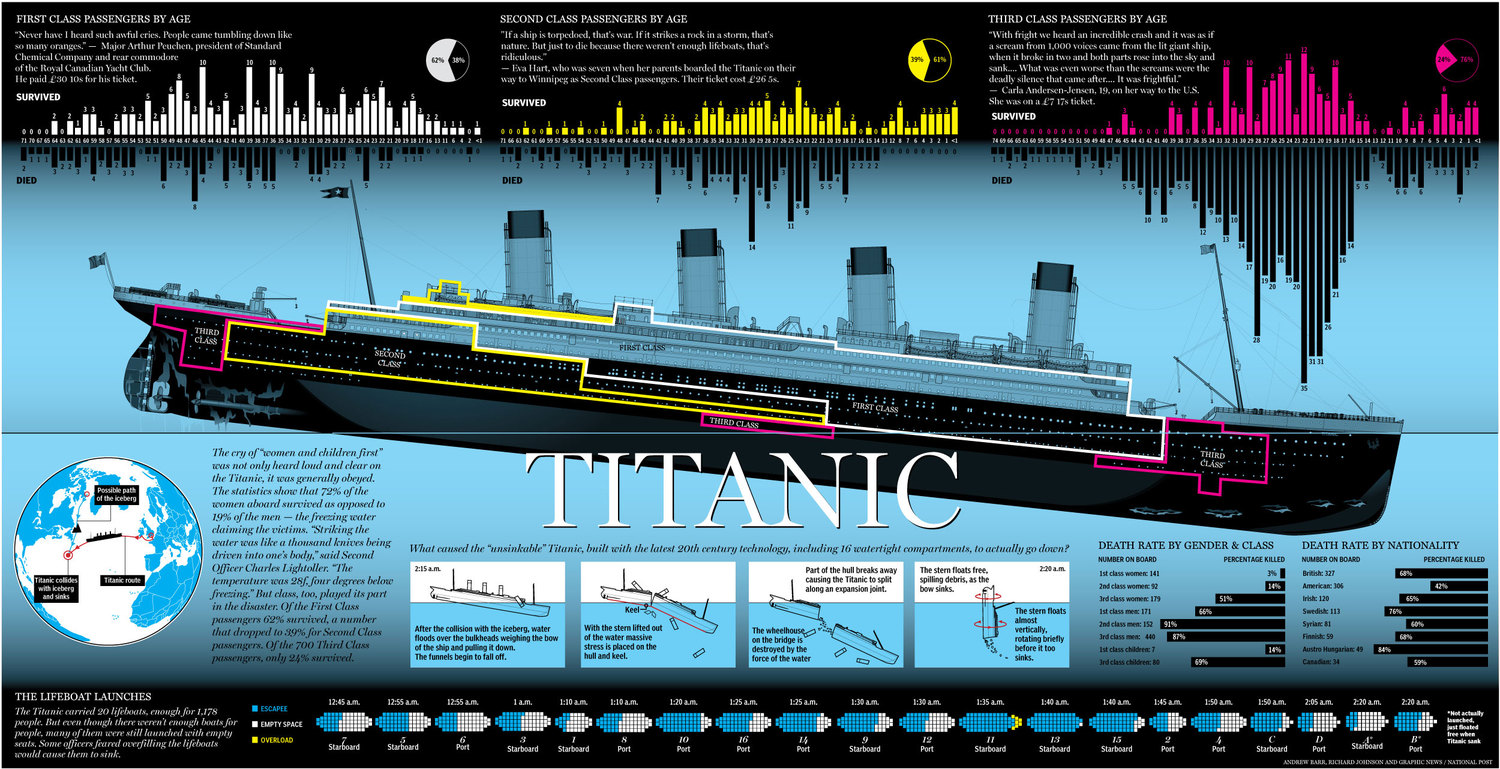

In [14]:
# Oe=verall visualization of the titanic
from IPython.display import Image
Image(filename=r"C:\PYTHON\Practice\TItanic-Survival-Infographic.jpg")

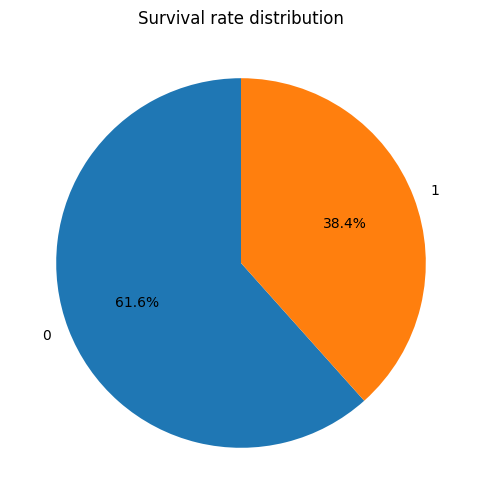

In [15]:
Survival= ttcopy['Survived'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(Survival.values, labels= Survival.index,autopct='%1.1f%%',startangle=90)
plt.title('Survival rate distribution',fontsize=12)
plt.show()

# 
 - Pie chart for sex column - Shows the number of males and females in the dataset
 

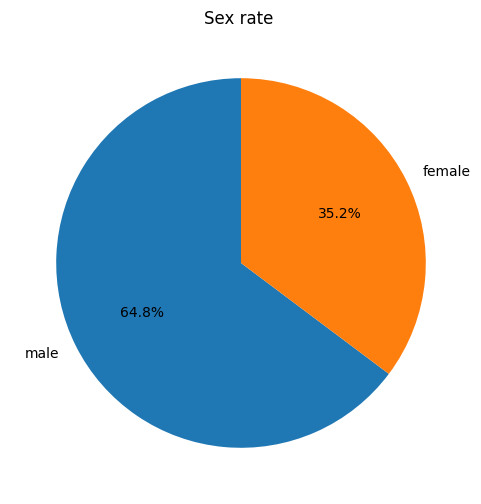

In [16]:
Sex_rate= ttcopy['Sex'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(Sex_rate.values, labels= Sex_rate.index,autopct='%1.1f%%',startangle=90)
plt.title('Sex rate ',fontsize=12)
plt.show()

# 
1. Survived vs Sex
   - More males survived than females.
   

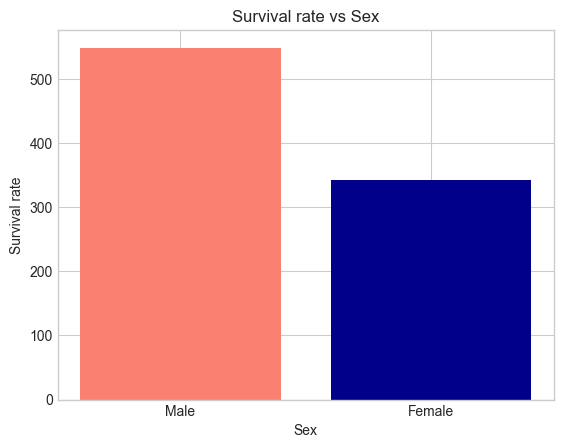

In [17]:
# Graph of survival rate depending on the sex column
Sex = ['Male','Female']
Survived = ttcopy['Survived'].value_counts()

plt.style.use('seaborn-v0_8-whitegrid')

plt.bar(Sex, Survived, color=['salmon','darkblue'])
plt.title('Survival rate vs Sex', fontsize=12)
plt.xlabel('Sex',fontsize=10)
plt.ylabel('Survival rate',fontsize=10)
plt.show()


# Survived Vs Pclass
  - Shows the survival rate vs the pclass 

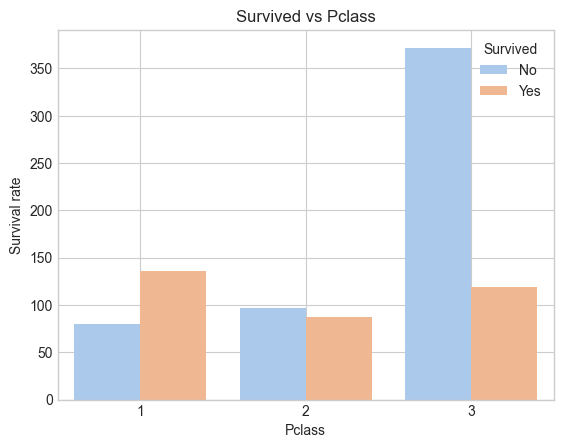

In [18]:
Survived = ttcopy['Survived']
Pclass = ttcopy['Pclass'].value_counts()
sns.countplot(data=ttcopy, x= 'Pclass', hue='Survived',palette='pastel')
plt.title('Survived vs Pclass',fontsize=12)
plt.xlabel('Pclass',fontsize=10)
plt.ylabel('Survival rate')
plt.grid(True)
plt.legend(title= 'Survived', labels=['No','Yes'])
plt.show()

# Sex vs Pclass
  - Shows the distribution of the sex against the Pclass available; 1,2,3

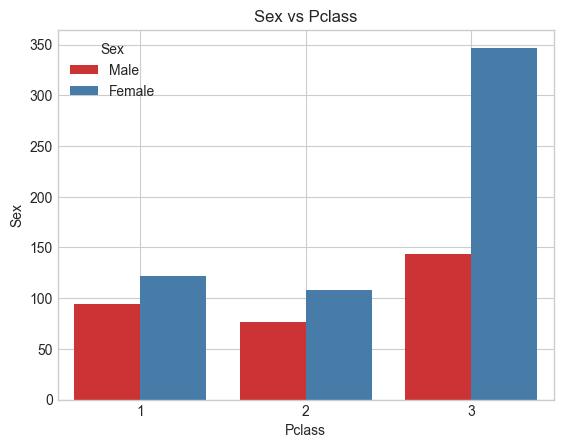

In [19]:
Pclass = ttcopy['Pclass'].value_counts()
sns.countplot(data=ttcopy, x= 'Pclass', hue='Sex',palette='Set1')
plt.title('Sex vs Pclass',fontsize=12)
plt.xlabel('Pclass',fontsize=10)
plt.ylabel('Sex')
plt.grid(True)
plt.legend(title= 'Sex', labels=['Male','Female'])
plt.show()

# Sex vs Age_group column
  - Shows the sex in the different age groups created
  - First graph depicts the available female and male numbers in the different age groups
  - Second graph shows how the rate of survival

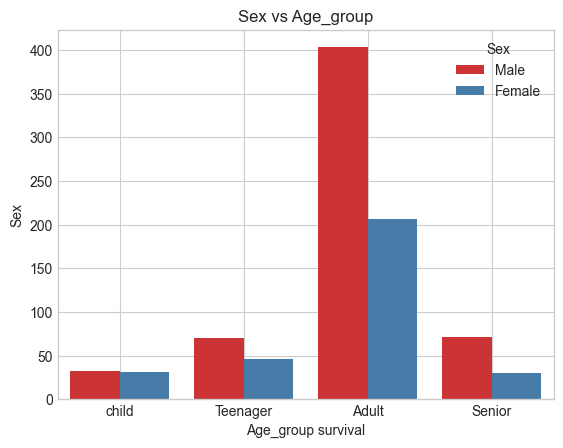

In [20]:
#Shows how many males and females are in the different age groups

Pclass = ttcopy['Age_group'].value_counts()
sns.countplot(data=ttcopy, x= 'Age_group', hue='Sex',palette='Set1')
plt.title('Sex vs Age_group',fontsize=12)
plt.xlabel('Age_group survival',fontsize=10)
plt.ylabel('Sex')
plt.grid(True)
plt.legend(title= 'Sex', labels=['Male','Female'])
plt.show()

# Countplot of Survived against the different age groups.
  - This shows the survival rate between the different age groups

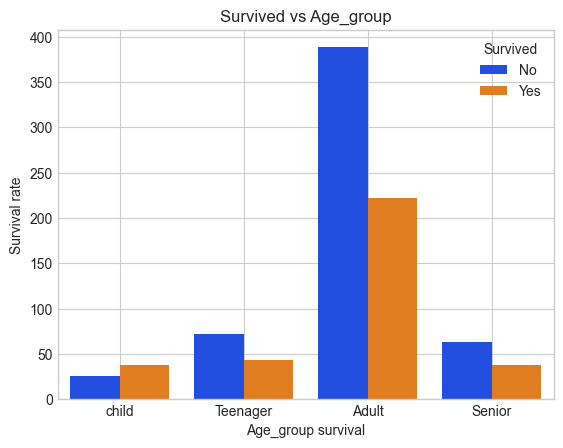

In [21]:
Survived = ttcopy['Survived']
Pclass = ttcopy['Age_group'].value_counts()
sns.countplot(data=ttcopy, x= 'Age_group', hue='Survived',palette='bright')
plt.title('Survived vs Age_group',fontsize=12)
plt.xlabel('Age_group survival',fontsize=10)
plt.ylabel('Survival rate')
plt.grid(True)
plt.legend(title= 'Survived', labels=['No','Yes'])
plt.show()

# Survived vs Embarked
  - Shows the survival rate depending on the stage embarked at

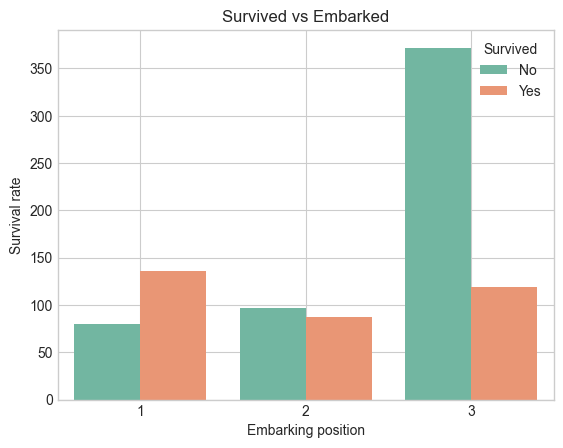

In [22]:
Survived=ttcopy['Survived']
Embarked =ttcopy['Embarked'].value_counts()

sns.countplot(data=ttcopy, x='Pclass',hue='Survived', palette='Set2')
plt.title('Survived vs Embarked',fontsize=12)
plt.xlabel('Embarking position', fontsize=10)
plt.ylabel('Survival rate', fontsize=10)
plt.legend(title= 'Survived',labels=['No','Yes'])
plt.grid(True)
plt.show()

# Fare distribution between fare and sex
  - Using a KDE plot
  - KDE plots; you cannot plot categorical columns against each other

<function matplotlib.pyplot.show(close=None, block=None)>

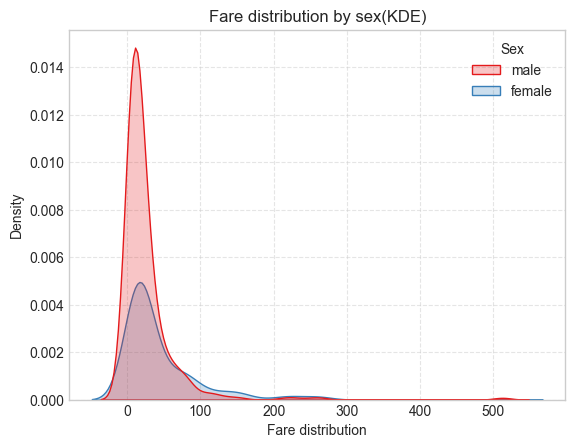

In [23]:
Fare= ttcopy['Fare']
sns.kdeplot(data=ttcopy,x='Fare',hue='Sex', palette='Set1',fill=True)
plt.title('Fare distribution by sex(KDE)')
plt.xlabel('Fare distribution')
plt.ylabel('Density')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show

# KDE plot for fare against Pclass
  - Shows the fare distribution against the different Pclasses

<function matplotlib.pyplot.show(close=None, block=None)>

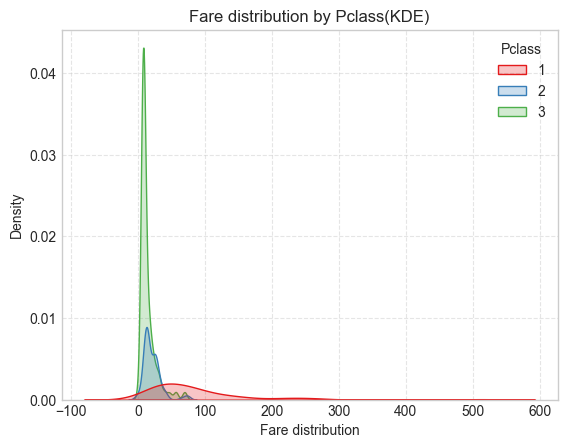

In [24]:
Fare= ttcopy['Fare']
sns.kdeplot(data=ttcopy,x='Fare',hue='Pclass', palette='Set1',fill=True,)

plt.title('Fare distribution by Pclass(KDE)')
plt.xlabel('Fare distribution')
plt.ylabel('Density')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show

# Data Encoding

# 
 - Drop the unnecessary columns.

In [25]:
ttcopy.drop(columns=['Name','Ticket'],inplace=True)
ttcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    float64 
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    object  
 6   Family_size  891 non-null    int64   
 7   Age_group    891 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB


# Use label encoder
 - For the categorical  column.

In [26]:
from sklearn.preprocessing import LabelEncoder
a= LabelEncoder()
ttcopy['Sex'] = a.fit_transform(ttcopy['Sex'])
ttcopy['Embarked'] = a.fit_transform(ttcopy['Embarked'])
ttcopy['Age_group'] = a.fit_transform(ttcopy['Age_group'])
ttcopy


,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Age_group
0,0,3,1,22.0,7.2500,2,2,0
1,1,1,0,38.0,71.2833,0,2,0
2,1,3,0,26.0,7.9250,2,1,0
3,1,1,0,35.0,53.1000,2,2,0
4,0,3,1,35.0,8.0500,2,1,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,1,0
887,1,1,0,19.0,30.0000,2,1,2
888,0,3,0,28.0,23.4500,2,4,0
889,1,1,1,26.0,30.0000,0,1,0


# Correlation Heatmap

<Axes: >

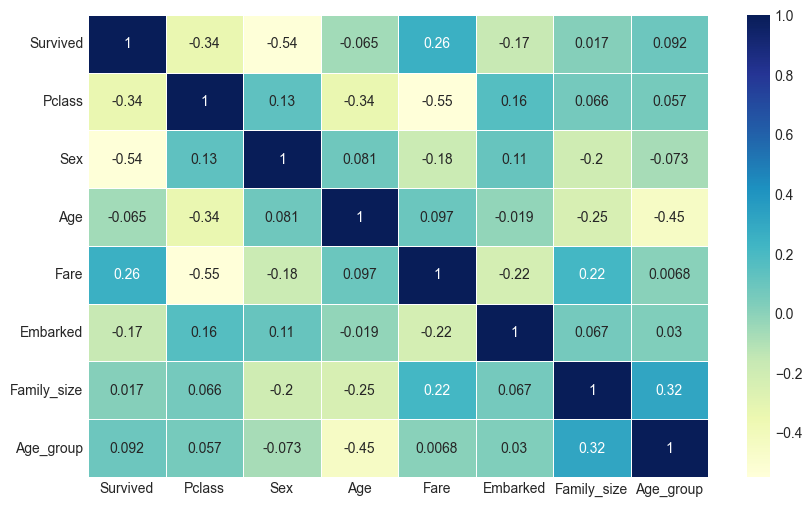

In [27]:
corr = ttcopy.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.heatmap(ttcopy.corr(), annot= True, linewidths=0.5,cmap="YlGnBu")


# Training and testing
 - Separate the data depending on the label encoding done
 - Target column is Survived

In [28]:
from sklearn.model_selection import train_test_split

x= ttcopy.drop('Survived',axis=1)
y= ttcopy['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
len(x_train)  

623

# Predictive models- Standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
x_train_a = a.fit_transform(x_train)
x_test_a = a.transform(x_test)

# Logistic Regression model 
 - Fitting it into a model

In [30]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(max_iter=200)
xy_train = l.fit(x_train_a,y_train)
xy_train

LogisticRegression(max_iter=200)

#
 - Predict the data

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = xy_train.predict(x_test_a)

print(f'Accuracy score:',accuracy_score(y_test,y_pred))
print(f'confusion_matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy score: 0.8134328358208955
confusion_matrix [[151  23]
 [ 27  67]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.74      0.71      0.73        94

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



#
 - Validation curve

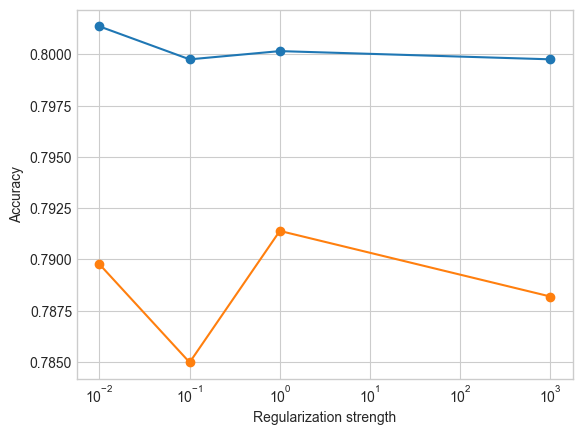

In [32]:
from sklearn.model_selection import validation_curve

param_range=[0.01,0.1,1,1000]
train_scores,val_scores = validation_curve(LogisticRegression(max_iter=1000),x_train_a,y_train,param_name="C",
                                           param_range= param_range,cv=5,scoring="accuracy")
plt.semilogx(param_range,np.mean(train_scores,axis=1),label='Training score',marker='o')
plt.semilogx(param_range,np.mean(val_scores,axis=1),label='Validation score',marker='o')
plt.xlabel('Regularization strength')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Confusion matrix 
 - Provides a more detailed view of classification results. 
 - Breaks down predictions into 4 categories; True positives- correctly predicted positive classes, True negatives; Correctly predicted negative classes; False positives- Inorrectly predicted negative classes ; False negatives- Incorrectly predicted negative classes.

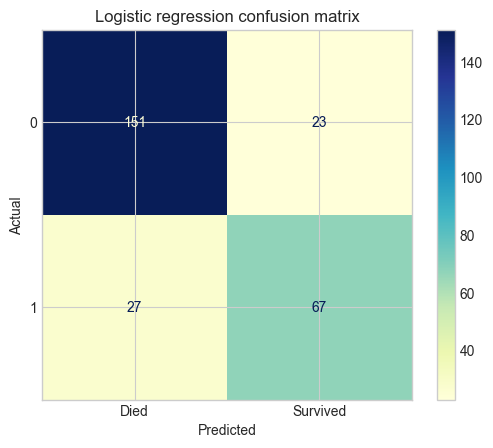

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xy_train.classes_)
cd.plot(cmap='YlGnBu')
plt.title('Logistic regression confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0,1],labels=('Died','Survived'))
plt.show()

# Random forest regression

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# splitting the data
from sklearn.model_selection import train_test_split
x= ttcopy.drop('Survived',axis=1)
y= ttcopy['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

# Standard scaling the data
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
x_train_a = a.fit_transform(x_train)
x_test_a = a.transform(x_test)

#Create a randomforest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=10)

#fitting the data to a model
rmodel = rfc.fit(x_train_a,y_train)

#Predicting the data
y_pred = rmodel.predict(x_test_a)

print(f'Accuracy score:',accuracy_score(y_test,y_pred))
print(f'confusion_matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy score: 0.8208955223880597
confusion_matrix [[147  27]
 [ 21  73]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       174
           1       0.73      0.78      0.75        94

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



# Explanation of the above
 - TN (True Negative = 147): Actual class = 0 and model predicted 0 correctly.

 -FP (False Positive = 27): Actual class = 0 but model wrongly predicted 1.

 -FN (False Negative = 21): Actual class = 1 but model wrongly predicted 0.

 -TP (True Positive = 73): Actual class = 1 and model predicted 1 correctly.
 - For Class 0 (Label 0):
   -Precision 0.88: Out of all times the model predicted class 0, 88% were correct.

   -Recall 0.84: Out of all actual class 0 samples, 84% were correctly identified.

   -F1-score 0.86: Harmonic mean of precision and recall.

-For Class 1 (Label 1):
   -Precision 0.73: When the model predicted class 1, 73% were correct.

   -Recall 0.78: Out of all real class 1 samples, 78% were caught by the model.

   -F1-score 0.75: Balance between precision and recall.




# Confusion matrix for random forest

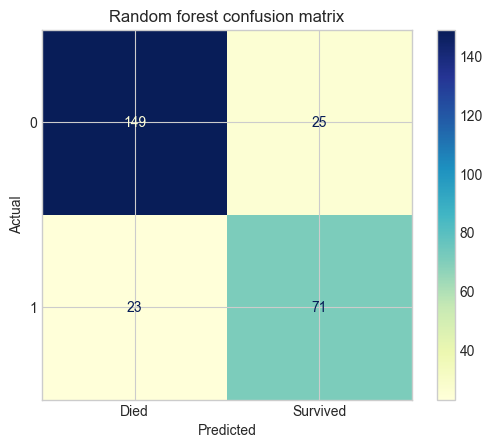

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rmodel.classes_)
cd.plot(cmap='YlGnBu')
plt.title('Random forest confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0,1],labels=('Died','Survived'))
plt.show()

# K-Nearest Neighbour model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# splitting the data
from sklearn.model_selection import train_test_split
x= ttcopy.drop('Survived',axis=1)
y= ttcopy['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

# Standard scaling the data
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
x_train_a = a.fit_transform(x_train)
x_test_a = a.transform(x_test)

#Create a randomforest classifier
knn = KNeighborsClassifier(n_neighbors=3) #k=3

#fitting the data to a model
kmodel = knn.fit(x_train_a,y_train)

#Predicting the data
y_pred = kmodel.predict(x_test_a)

print(f'Accuracy score:',accuracy_score(y_test,y_pred))
print(f'confusion_matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy score: 0.8208955223880597
confusion_matrix [[149  25]
 [ 23  71]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       174
           1       0.74      0.76      0.75        94

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.82      0.82       268



# Confusion matrix for the KNN

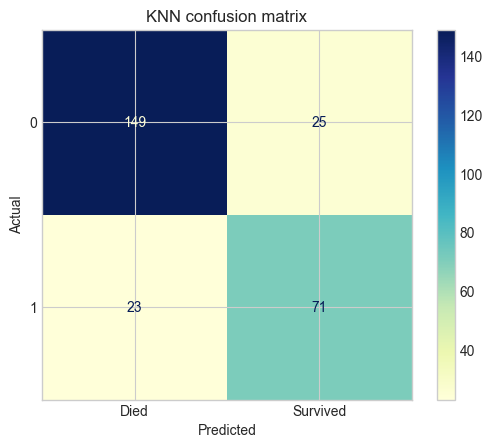

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=kmodel.classes_)
cd.plot(cmap='YlGnBu')
plt.title('KNN confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0,1],labels=('Died','Survived'))
plt.show()